1.5.9 Feature Matching


In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [25]:
img1 = cv2.imread('table1.png',0) # queryImage
img2 = cv2.imread('table2.png',0) # trainImage

In [26]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

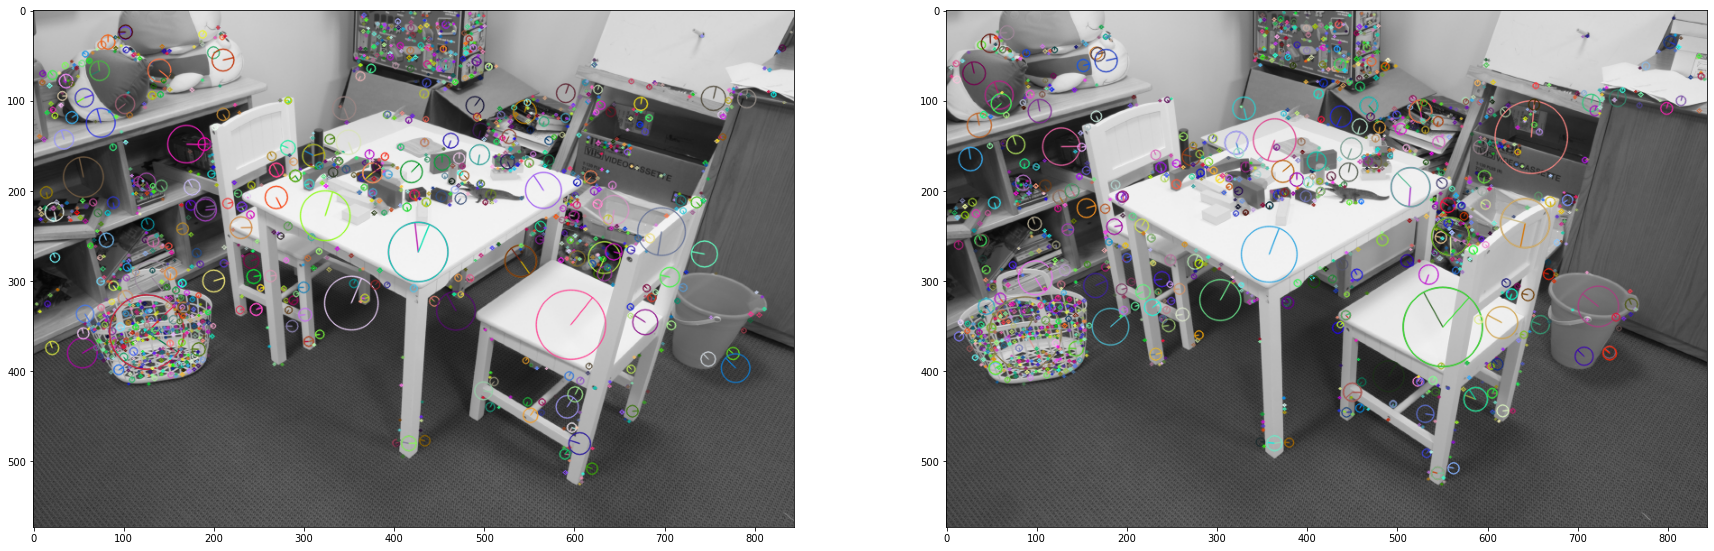

In [27]:
img1v = cv2.drawKeypoints(img1,kp1,img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2v = cv2.drawKeypoints(img2,kp2,img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize =(30,26))
plt.subplot(1,2,1),plt.imshow(img1v)
plt.subplot(1,2,2),plt.imshow(img2v)
plt.show()

In [36]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []

In [37]:
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [40]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

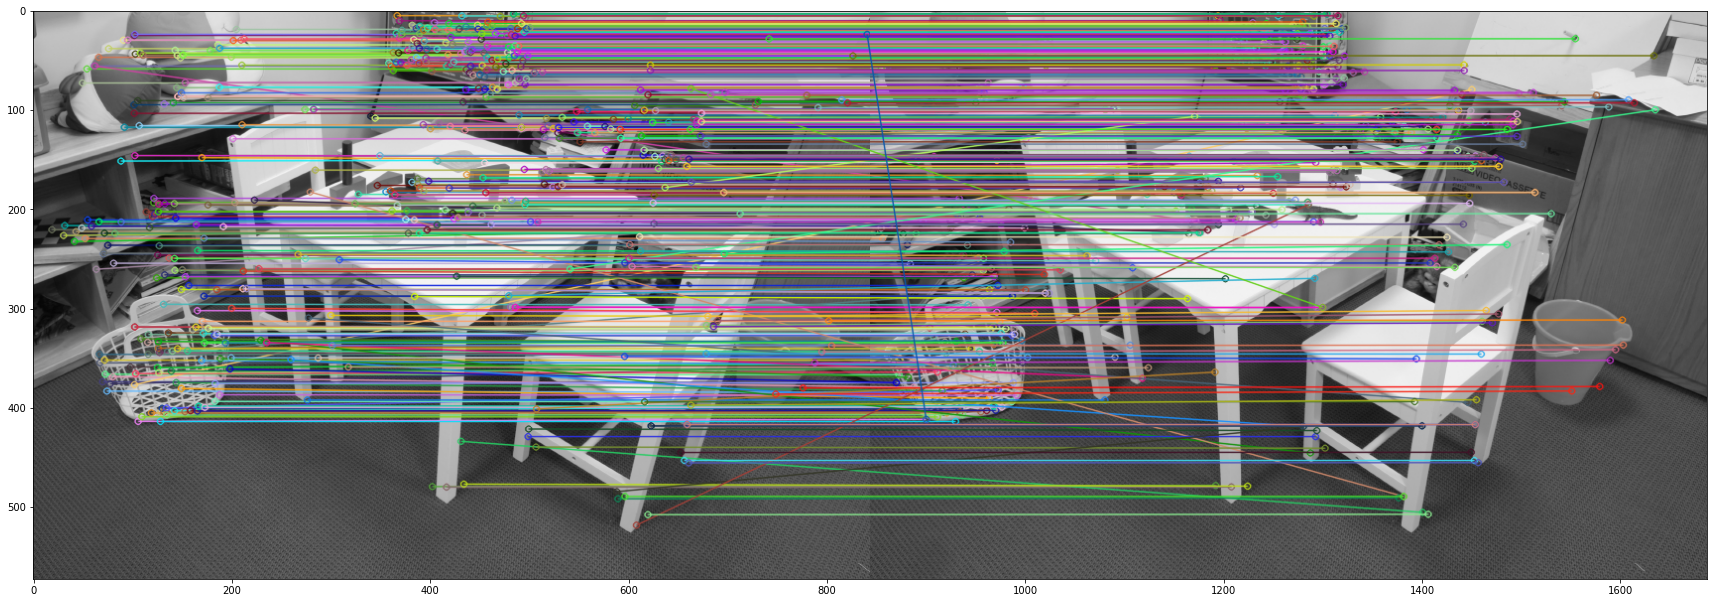

(<matplotlib.image.AxesImage at 0x1c10727b400>, None)

In [41]:
plt.figure(figsize =(30,15))
plt.imshow(img3),plt.show()